# Plotting the band structure and projected density of states (pDOS) from Quantum ESPRESSO output-files

*Spin-polarized band structures are not yet supported...*

## The band structure plot

To plot the band structure from the quantum espresso output the function ``read_band_structure`` from the ``io`` sub-package can be used to parse the eigenvalues and k-points from the band output file:

In [1]:
from aim2dat.io.qe import read_band_structure

band_structure = read_band_structure("files/el_bands_qe/bands.dat")

The output of the function is a dictionary containing a list of k-points and a nested list of eigenvalues:

In [2]:
band_structure.keys()

dict_keys(['kpoints', 'unit_y', 'bands'])

Now the `BandStructurePlot` class in the plots sub-package is used to visualize the band structure. For non-cubic systems the unit-cell needs to be given as nested list or numpy-array to scale the k-points accordingly. Additional attributes can be set to show and store the plot:

In [3]:
from aim2dat.plots import BandStructurePlot

bands_plot = BandStructurePlot()
bands_plot.store_path = "."
bands_plot.store_plot = True
bands_plot.show_plot = True
bands_plot.set_reference_cell(
    [
        [0.000, 2.692, 2.692],
        [2.692, 0.000, 2.692],
        [2.692, 2.692, 0.000],
    ]
)

The labels of the high-symmetry points are given as a list of pairs with the indices of the k-points.

In [4]:
path_labels = [(0, "W"), (41, "L"), (92, "\\Gamma"), (151, "X"), (181, "W"), (204, "K")]

All plotting classes distinguish two steps:
1. Importing the data: The band structure is imported with the `import_band_structure`-function. All data sets have its own `data_label` to distinguish them.
2. Data sets chosen by their `data_label` are plotted with the function `plot`. A title and the file-name can be passed via the parameters ``plot_title`` and `plot_name`, respectively.

In [5]:
bands_plot.import_band_structure(
    data_label="test_band_structure",
    kpoints=band_structure["kpoints"],
    path_labels=path_labels,
    bands=band_structure["bands"],
    unit_y=band_structure["unit_y"],
)

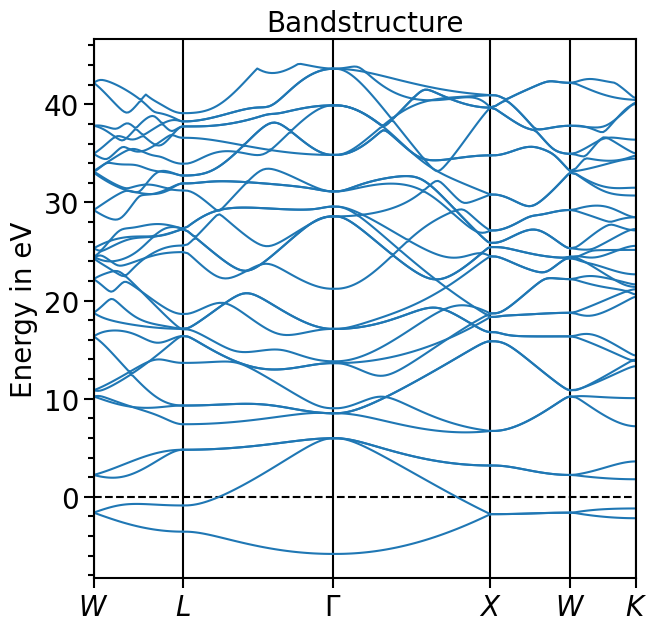

In [6]:
plot = bands_plot.plot(
    "test_band_structure", plot_title="Bandstructure", plot_name="bands_plot.png"
)

The valence band maximum (vbm) can be read from the output-file and the whole band structure can be shifted accordingly:

In [7]:
bands_plot.shift_bands("test_band_structure", -5.9678)

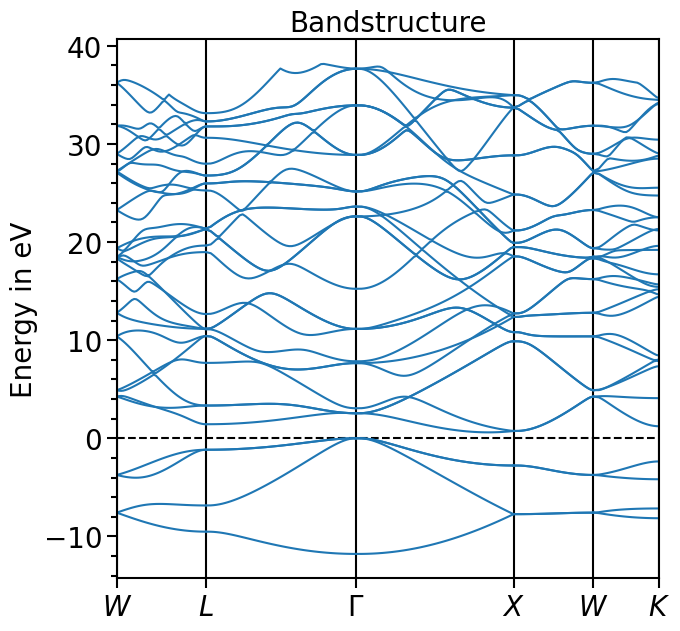

In [8]:
plot = bands_plot.plot(
    "test_band_structure", plot_title="Bandstructure", plot_name="bands_plot.png"
)

The x-range is set to show the whole k-path, the y-range can be set via the attribute `y_range`:

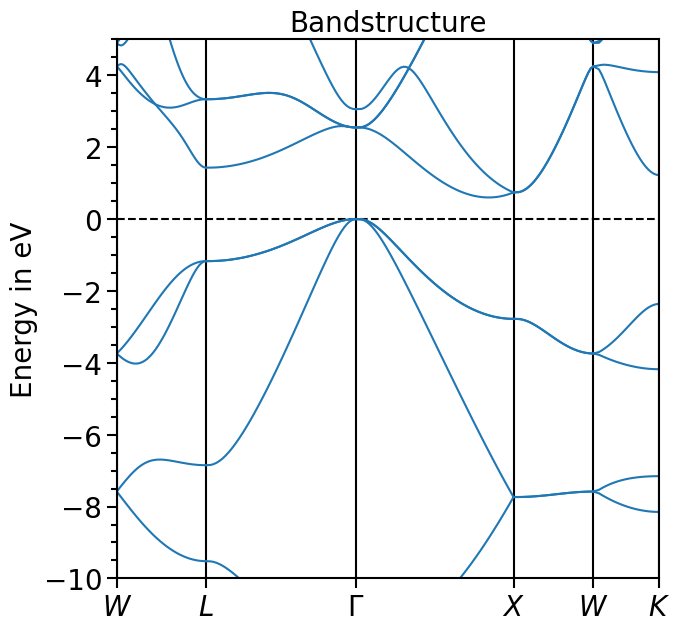

In [9]:
bands_plot.y_range = (-10, 5)
plot = bands_plot.plot(
    "test_band_structure", plot_title="Bandstructure", plot_name="bands_plot.png"
)

The same plot can be also visualized using plotly by switching the ``backend`` property. This way interactive features can be utilized:

In [10]:
import plotly.io as pio
pio.renderers.default = "sphinx_gallery"

bands_plot.ratio = (6.3, 6.3)
bands_plot.backend = "plotly"
bands_plot.store_plot = False
plot = bands_plot.plot("test_band_structure", plot_title="Bandstructure")

Other functions include the calculation of the band gap (if the occupations are given, the index of the highest valence band or 0 eV is set within the band gap as done here):

In [11]:
bands_plot.calculate_band_gap("test_band_structure")

{'direct_gap': 2.5489999999999995,
 'direct_gap_kpoint': [0.0, 0.0, 0.0],
 'direct_gap_label': '\\Gamma',
 'direct_gap_rel_distance': 0.0,
 'indirect_gap': 0.6020000000000003,
 'vbm_kpoint': [0.0, 0.0, 0.0],
 'vbm_label': '\\Gamma',
 'vbm_rel_distance': 0.0,
 'vbm_energy': 0.00019999999999953388,
 'vbm_band_idx': 3,
 'cbm_kpoint': [0.0, 0.830508, 0.0],
 'cbm_energy': 0.6021999999999998,
 'cbm_label': None,
 'cbm_rel_distance': 0.830508,
 'cbm_band_idx': 4}

The smallest energy gap between two bands:

In [12]:
bands_plot.calculate_smallest_energy_diff("test_band_structure", 4, 10)

{'energy': 3.596,
 'kpoint_min': [0.0, 0.0, 0.0],
 'kpoint_max': [0.0, 1.0, 0.5],
 'label_min': '\\Gamma',
 'rel_distance_min': 0.0,
 'label_max': 'W',
 'rel_distance_max': 0.0}

The smallest direct energy difference between two bands:

In [13]:
bands_plot.calculate_smallest_direct_energy_diff("test_band_structure", 4, 10)

{'energy': 5.296000000000001,
 'kpoint': [0.0, 0.0, 0.0],
 'label': '\\Gamma',
 'rel_distance': 0.0}

Calculate the energy difference between two bands at a certain k-point:

In [14]:
bands_plot.calculate_energy_diff_at_kpoint("test_band_structure", 4, 10, (0.0, 0.0, 0.0))

5.296000000000001

The minimum and maximum of a single band:

In [15]:
bands_plot.analyse_band("test_band_structure", 4)

({'energy': 0.6021999999999998, 'kpoint': [0.0, 0.830508, 0.0]},
 {'energy': 4.2492, 'kpoint': [0.0, 1.0, 0.5]})

## The projected density of states plot

The procedure to plot the projected density of states is very similar to plotting the band structure. There is a function in the `io` sub-package to parse the projected density of states from the output-files.

In this case the path to the folder needs to be given. Based on the standard pattern of the file names of Quantum ESPRESSO the corresponding files are read and the information is parsed:

In [16]:
from aim2dat.io.qe import read_atom_proj_density_of_states

pdos = read_atom_proj_density_of_states("files/el_pdos_qe/")

print(pdos["pdos"][0].keys())

dict_keys(['kind', '1_s', '2_px', '2_py', '2_pz'])


Next, an object of the `DOSPlot`-class is created and the pojected density of states can be loaded. We shift the pDOS straight-away such that the valence band maximum is at 0 eV with the parameter `shift_dos`.

The parameters `sum_kinds`, `sum_principal_qn` and `sum_magnetic_qn` sum up over different atoms of the same element, the principal and magnetic quantum numbers, respectively.

In [17]:
from aim2dat.plots import DOSPlot

dos_plot = DOSPlot()
dos_plot.import_projected_dos(
    "test_pdos",
    pdos["energy"],
    pdos["pdos"],
    shift_dos=-5.9678,
    sum_kinds=False,
    sum_principal_qn=True,
    sum_magnetic_qn=True,
)

Likewise to the band structure plot, we can plot the pDOS using the `plot` function. s-orbitals are solid lines, p-orbitals, dashed, d-orbitals dotted and f-orbitals dash-dotted.
The colors and line styles can be changed with the attributes `dos_colors` and `dos_linestyles`, respectively.

The input parameters are the same as before and with the class's attributes the range and other features of the plot can be adjusted:

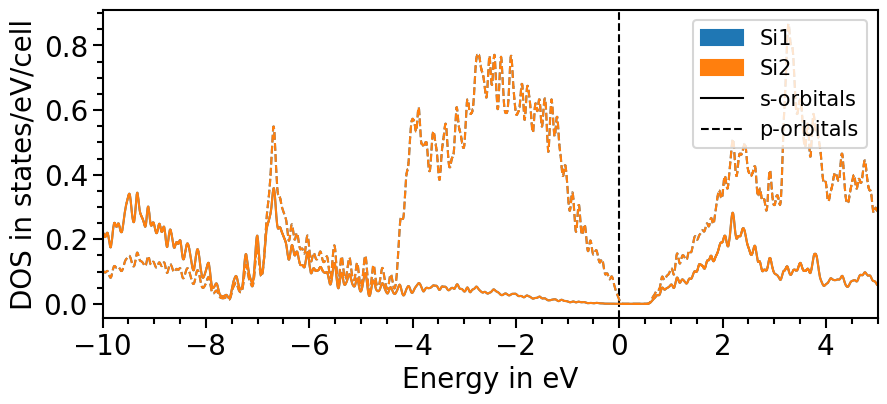

In [18]:
dos_plot.show_plot = True
dos_plot.show_legend = True
dos_plot.x_range = (-10, 5)
plot = dos_plot.plot("test_pdos")

There are two options to include the total density of states:

* All projected densities can be summed. Depending on the basis set and how well it can be projected onto the localized orbitals this may not always lead to the total density of states.
* The total density of states can be imported for a dataset as before done with the projected DOS.

Here is the first option:

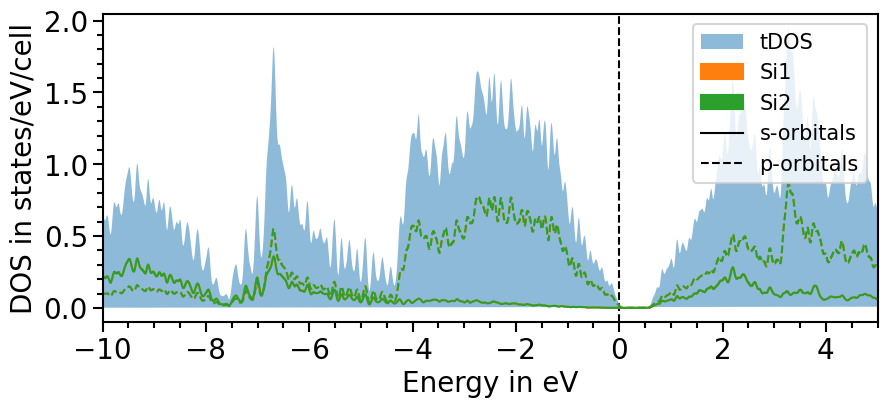

In [19]:
dos_plot.sum_pdos = True
plot = dos_plot.plot("test_pdos")

The second option involves another function of the `io` sub-package to parse the total density of states directly from the output-file:

In [20]:
from aim2dat.io.qe import read_total_density_of_states

tdos = read_total_density_of_states("files/el_pdos_qe/dos.dat")

dos_plot.import_projected_dos(
    "test_pdos_2",
    pdos["energy"],
    pdos["pdos"],
    shift_dos=-5.9678,
    sum_kinds=False,
    sum_magnetic_qn=True,
)
dos_plot.import_total_dos("test_pdos_2", tdos["energy"], tdos["tdos"], shift_dos=-5.9678)

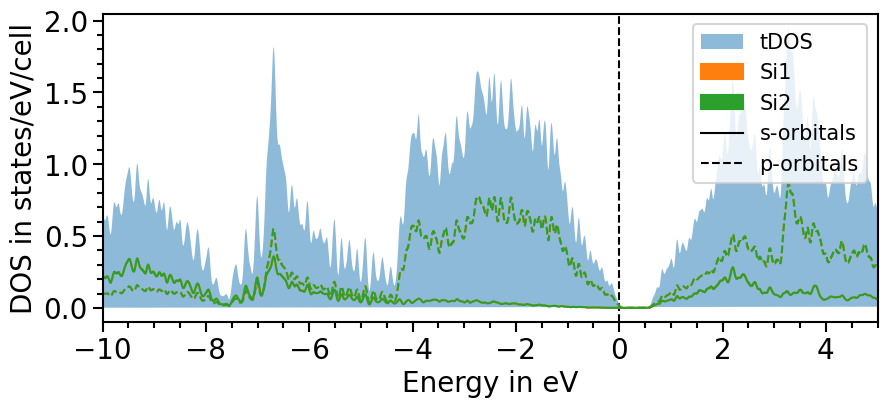

In [21]:
plot = dos_plot.plot("test_pdos_2")

Another feature is to smear the density of states to create a smoother look. The strength of the smearing can be ajusted with the attributes `smearing_delta` and `smearing_sigma`. 

The parameter `use_smearing` activates the smearing:

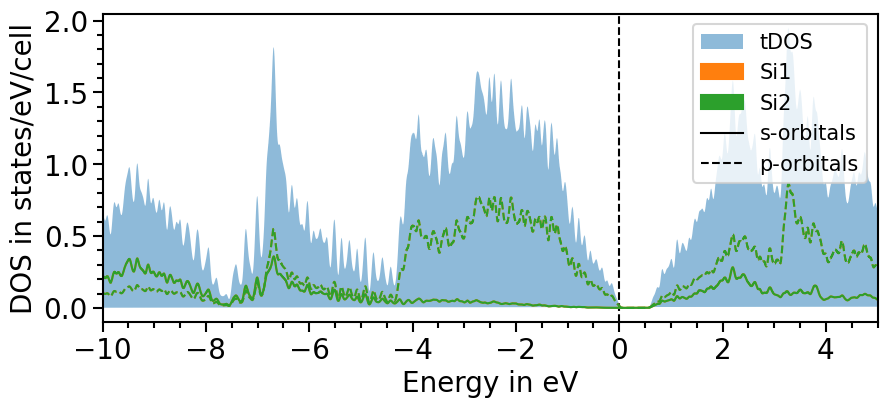

In [22]:
dos_plot.smearing_delta = 0.001
dos_plot.smearing_sigma = 0.01
dos_plot.import_projected_dos(
    "test_pdos_smeared",
    pdos["energy"],
    pdos["pdos"],
    shift_dos=-5.9678,
    sum_kinds=False,
    sum_magnetic_qn=True,
    use_smearing=True,
)
dos_plot.import_total_dos(
    "test_pdos_smeared", tdos["energy"], tdos["tdos"], shift_dos=-5.9678, use_smearing=True
)
plot = dos_plot.plot("test_pdos_smeared")

## Band structure + projected density of states plot

The two previous plots can also be combined in one figure with the `BandStructureDOSPlot` class:

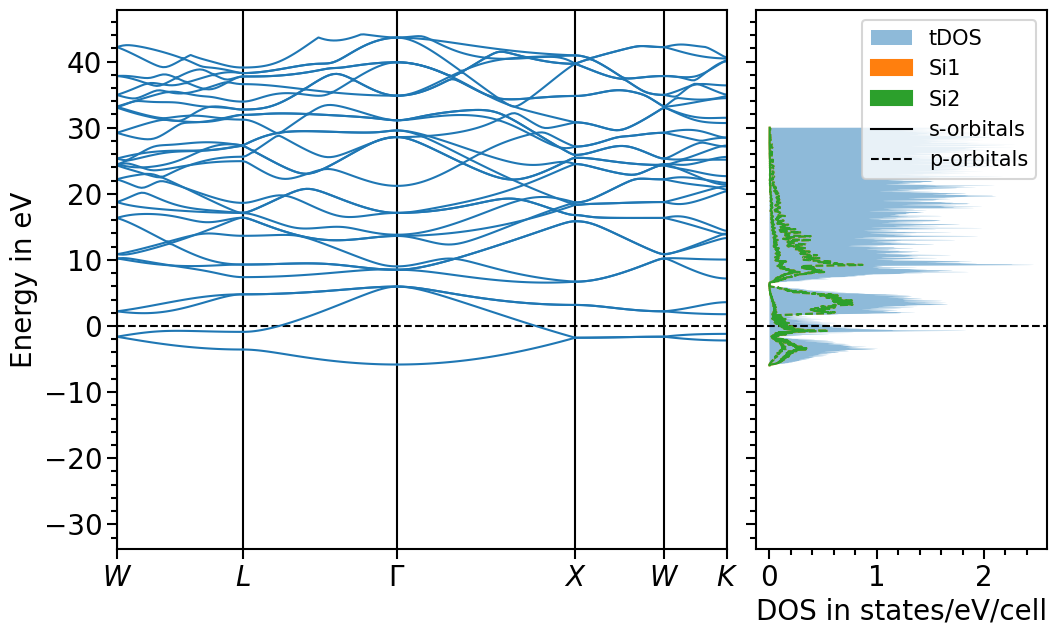

In [23]:
from aim2dat.plots import BandStructureDOSPlot

bands_dos_plot = BandStructureDOSPlot()
bands_dos_plot.show_plot = True
bands_dos_plot.import_band_structure(
    data_label="test_band_structure_dos",
    kpoints=band_structure["kpoints"],
    path_labels=path_labels,
    bands=band_structure["bands"],
    unit_y=band_structure["unit_y"],
)
bands_dos_plot.import_projected_dos("test_band_structure_dos", pdos["energy"], pdos["pdos"])
bands_dos_plot.import_total_dos(
    "test_band_structure_dos",
    tdos["energy"],
    tdos["tdos"],
)
plot = bands_dos_plot.plot("test_band_structure_dos")

We can shift the band structure and DOS with the follwoing function:

In [24]:
bands_dos_plot.shift_bands_and_dos("test_band_structure_dos", -5.9678)

And choose the x- and y-range as well as the figure ratio and the ratio between band structure and dos plot:

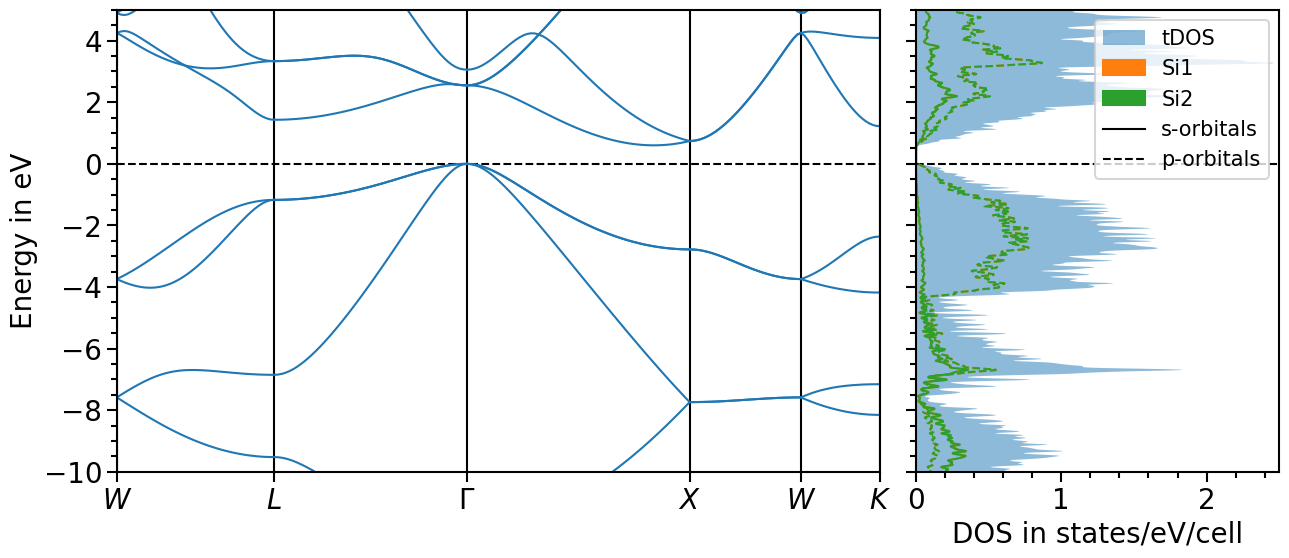

In [25]:
bands_dos_plot.ratio = (15, 6)
bands_dos_plot.x_range = (0, 2.5)
bands_dos_plot.y_range = (-10, 5)
bands_dos_plot.show_legend = [False, True]
plot = bands_dos_plot.plot("test_band_structure_dos")